In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2017-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2017_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사하구,8175,사하구,750,10.1%,"7,800"
1,2017-01-12,고등어,30㎝정도 500g 1마리,2750,사하구,5197,사하구,2447,88.98%,"3,974"
2,2017-01-12,달걀,오경슈퍼란60g정도 10개,3680,사하구,3790,사하구,110,2.99%,"3,735"
3,2017-01-12,닭고기,육계 1.0㎏,5590,사하구,5909,사하구,319,5.71%,"5,750"
4,2017-01-12,대파,1.0㎏,4257,사하구,4986,사하구,729,17.12%,"4,622"
5,2017-01-12,돼지고기,삼겹살 500g,9950,사하구,12250,사하구,2300,23.12%,"11,100"
6,2017-01-12,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
7,2017-01-12,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
8,2017-01-12,맥주,하이트 500㎖ 1병,1340,사하구,1380,사하구,40,2.99%,"1,360"
9,2017-01-12,무,2.0㎏ 1개,1980,사하구,3290,사하구,1310,66.16%,"2,635"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2017-04-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2017_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-04-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,사하구,7490,사하구,65,0.88%,"7,458"
1,2017-04-06,달걀,오경슈퍼란60g정도 10개,2980,사하구,3500,사하구,520,17.45%,"3,240"
2,2017-04-06,닭고기,육계 1.0㎏,5909,사하구,6990,사하구,1081,18.29%,"6,450"
3,2017-04-06,대파,1.0㎏,4166,사하구,4972,사하구,806,19.35%,"4,569"
4,2017-04-06,돼지고기,삼겹살 500g,7950,사하구,9300,사하구,1350,16.98%,"8,625"
5,2017-04-06,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
6,2017-04-06,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
7,2017-04-06,맥주,하이트 500㎖ 1병,1340,사하구,1460,사하구,120,8.96%,"1,400"
8,2017-04-06,무,2.0㎏ 1개,2380,사하구,2500,사하구,120,5.04%,"2,440"
9,2017-04-06,밀가루,백설표 중력분1등2.5㎏,3430,사하구,3790,사하구,360,10.5%,"3,610"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2017-07-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2017_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-07-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5615,사하구,8175,사하구,2560,45.59%,"6,895"
1,2017-07-06,간장,오복왕표 0.9ℓ 1병,6390,사하구,6677,사하구,287,4.49%,"6,534"
2,2017-07-06,고등어,30㎝정도 500g 1마리,3214,사하구,5250,사하구,2036,63.35%,"4,232"
3,2017-07-06,달걀,오경슈퍼란60g정도 10개,3480,사하구,3790,사하구,310,8.91%,"3,635"
4,2017-07-06,닭고기,육계 1.0㎏,4990,사하구,6818,사하구,1828,36.63%,"5,904"
5,2017-07-06,대파,1.0㎏,2777,사하구,2828,사하구,51,1.84%,"2,803"
6,2017-07-06,돼지고기,삼겹살 500g,9950,사하구,14300,사하구,4350,43.72%,"12,125"
7,2017-07-06,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
8,2017-07-06,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
9,2017-07-06,맥주,하이트 500㎖ 1병,1420,사하구,1460,사하구,40,2.82%,"1,440"


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "사하구"
region_code = "12"
target_date = "2017-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("사하구2017_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8175,사하구,8428,사하구,253,3.09%,"8,302"
1,2017-10-12,간장,오복왕표 0.9ℓ 1병,6390,사하구,6677,사하구,287,4.49%,"6,534"
2,2017-10-12,고등어,30㎝정도 500g 1마리,2166,사하구,4433,사하구,2267,104.66%,"3,300"
3,2017-10-12,달걀,오경슈퍼란60g정도 10개,2780,사하구,2990,사하구,210,7.55%,"2,885"
4,2017-10-12,닭고기,육계 1.0㎏,5909,사하구,5990,사하구,81,1.37%,"5,950"
5,2017-10-12,대파,1.0㎏,4027,사하구,4861,사하구,834,20.71%,"4,444"
6,2017-10-12,돼지고기,삼겹살 500g,9900,사하구,10450,사하구,550,5.56%,"10,175"
7,2017-10-12,두부,500g 판두부(국산포장두부 420g) 1모,4365,사하구,4410,사하구,45,1.03%,"4,388"
8,2017-10-12,라면,신라면 120g 1봉지,676,사하구,678,사하구,2,0.3%,677
9,2017-10-12,맥주,하이트 500㎖ 1병,1420,사하구,1460,사하구,40,2.82%,"1,440"


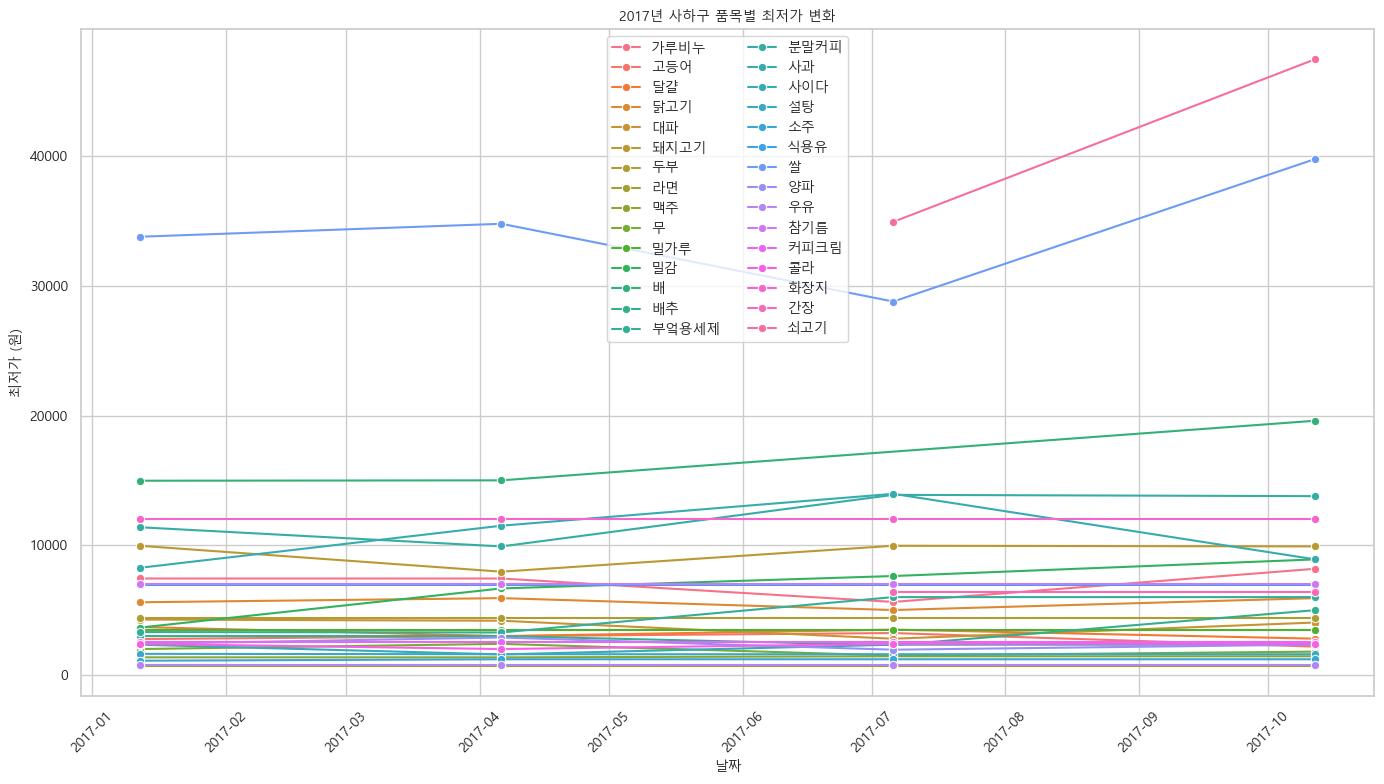

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2017_1q.csv")
q2 = pd.read_csv("사하구2017_2q.csv")
q3 = pd.read_csv("사하구2017_3q.csv")
q4 = pd.read_csv("사하구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 사하구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("사하구2017_min.csv", index=False, encoding="utf-8-sig")

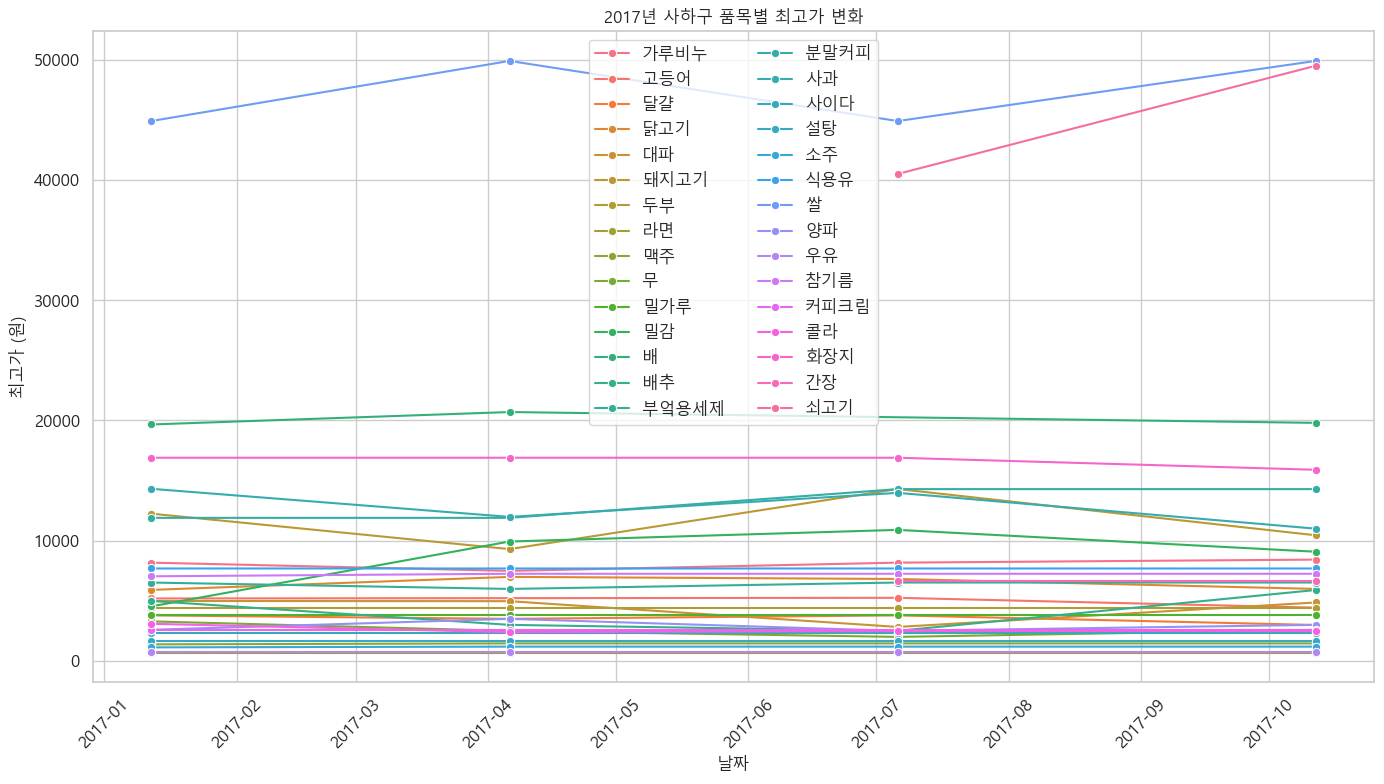

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("사하구2017_1q.csv")
q2 = pd.read_csv("사하구2017_2q.csv")
q3 = pd.read_csv("사하구2017_3q.csv")
q4 = pd.read_csv("사하구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 사하구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("사하구2017_max.csv", index=False, encoding="utf-8-sig")